In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

%load_ext autoreload
%autoreload 2
from base import evaluation, localizer, classifier

2024-03-17 23:31:33.121412: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-17 23:31:33.141578: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-17 23:31:33.242637: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-17 23:31:33.242684: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-17 23:31:33.259704: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
ground_truth_df = pd.read_csv('submission/dataset/test_labels.csv').sort_values(['ObjectID', 'TimeIndex']).reset_index(drop=True)
submission_df = pd.read_csv('submission/submission/debug_submission.csv').sort_values(['ObjectID', 'TimeIndex']).reset_index(drop=True)

In [3]:
evaluator = evaluation.NodeDetectionEvaluator(ground_truth=ground_truth_df, participant=submission_df)
precision, recall, f2, rmse, total_tp, total_fp, total_fn, total_df = evaluator.score()
print(f2, total_tp, total_fp, total_fn)

0.9734171630266931 1765 81 40


In [4]:
submission_df2 = pd.read_csv('submission/submission/debug_submission.csv').sort_values(['ObjectID', 'TimeIndex']).reset_index(drop=True)
tmp = pd.concat([submission_df, submission_df2]).drop_duplicates(keep=False)
tmp.head(20)

,ObjectID,TimeIndex,Direction,Node,Type


In [5]:
submission_df_2 = classifier.remove_ns_during_ew_nk_method(submission_df.copy())
submission_df_2 = submission_df_2[submission_df.columns]
evaluator = evaluation.NodeDetectionEvaluator(ground_truth=ground_truth_df, participant=submission_df_2)
precision, recall, f2, rmse, total_tp, total_fp, total_fn, total_df = evaluator.score()
print(f2, total_tp, total_fp, total_fn)

0.9646635401897699 1769 100 56


In [6]:
submission_df_3 = classifier.remove_consecutive_ID_IK_method(submission_df_2.copy())
evaluator = evaluation.NodeDetectionEvaluator(ground_truth=ground_truth_df, participant=submission_df_3)
precision, recall, f2, rmse, total_tp, total_fp, total_fn, total_df = evaluator.score()
print(f2, total_tp, total_fp, total_fn)

0.9602104570864847 1752 71 73


In [7]:
diffs = pd.concat([submission_df, submission_df_2]).drop_duplicates(keep=False)
print(diffs['ObjectID'].value_counts())
print(submission_df.loc[submission_df['ObjectID']==267])
print(submission_df_2.loc[submission_df_2['ObjectID']==267])
print(ground_truth_df.loc[ground_truth_df['ObjectID']==267])

Series([], Name: count, dtype: int64)
     ObjectID  TimeIndex Direction Node Type
163       267          0        EW   SS   EK
164       267          0        NS   SS   EK
165       267        193        EW   ID   NK
166       267        193        NS   ID   NK
167       267        590        EW   AD   NK
168       267        649        EW   AD   NK
169       267        663        EW   IK   EK
170       267        695        NS   ID   NK
     ObjectID  TimeIndex Direction Node Type
163       267          0        EW   SS   EK
164       267          0        NS   SS   EK
165       267        193        EW   ID   NK
166       267        193        NS   ID   NK
167       267        590        EW   AD   NK
168       267        649        EW   AD   NK
169       267        663        EW   IK   EK
170       267        695        NS   ID   NK
     ObjectID  TimeIndex Direction Node Type
206       267          0        EW   SS   EK
207       267          0        NS   SS   EK
208       267    

In [4]:
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F2: {f2:.3f}')
print(f'RMSE: {float(rmse):.4}')
print(f'TP: {total_tp} FP: {total_fp} FN: {total_fn}')
total_df = total_df.loc[total_df['Direction'] == 'EW']
tp_SS = len(total_df.loc[(total_df['Node'] == 'SS') & (total_df['classification'] == 'TP')])
fn_SS = len(total_df.loc[(total_df['Node'] == 'SS') & (total_df['classification'] == 'FP')])
tp_ID = len(total_df.loc[(total_df['Node'] == 'ID') & (total_df['classification'] == 'TP')])
fn_ID = len(total_df.loc[(total_df['Node'] == 'ID') & (total_df['classification'] == 'FN')])
tp_IK = len(total_df.loc[(total_df['Node'] == 'IK') & (total_df['classification'] == 'TP')])
fn_IK = len(total_df.loc[(total_df['Node'] == 'IK') & (total_df['classification'] == 'FN')])
tp_AD = len(total_df.loc[(total_df['Node'] == 'AD') & (total_df['classification'] == 'TP')])
fn_AD = len(total_df.loc[(total_df['Node'] == 'AD') & (total_df['classification'] == 'FN')])
print(f"TP/FN based on Node:")
print(f"ID: {tp_ID}|{fn_ID}")
print(f"IK: {tp_IK}|{fn_IK}")
print(f"AD: {tp_AD}|{fn_AD}")
print(f"SS: {tp_SS}|{fn_SS} (TP/FP)")

Precision: 0.96
Recall: 0.98
F2: 0.973
RMSE: 0.4535
TP: 1765 FP: 81 FN: 40
TP/FN based on Node:
ID: 344|18
IK: 412|19
AD: 268|3
SS: 741|26 (TP/FP)


In [9]:
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F2: {f2:.3f}')
print(f'RMSE: {float(rmse):.4}')
print(f'TP: {total_tp} FP: {total_fp} FN: {total_fn}')

tp_SS = len(total_df.loc[(total_df['Node'] == 'SS') & (total_df['classification'] == 'TP')])
fn_SS = len(total_df.loc[(total_df['Node'] == 'SS') & (total_df['classification'] == 'FP')])
tp_ID = len(total_df.loc[(total_df['Node'] == 'ID') & (total_df['classification'] == 'TP')])
fn_ID = len(total_df.loc[(total_df['Node'] == 'ID') & (total_df['classification'] == 'FN')])
tp_IK = len(total_df.loc[(total_df['Node'] == 'IK') & (total_df['classification'] == 'TP')])
fn_IK = len(total_df.loc[(total_df['Node'] == 'IK') & (total_df['classification'] == 'FN')])
tp_AD = len(total_df.loc[(total_df['Node'] == 'AD') & (total_df['classification'] == 'TP')])
fn_AD = len(total_df.loc[(total_df['Node'] == 'AD') & (total_df['classification'] == 'FN')])
print(f"TP/FN based on Node:")
print(f"ID: {tp_ID}|{fn_ID}")
print(f"IK: {tp_IK}|{fn_IK}")
print(f"AD: {tp_AD}|{fn_AD}")
print(f"SS: {tp_SS}|{fn_SS} (TP/FP)")

Precision: 0.96
Recall: 0.96
F2: 0.960
RMSE: 0.6289
TP: 1752 FP: 71 FN: 73
TP/FN based on Node:
ID: 338|30
IK: 398|38
AD: 269|5
SS: 747|26 (TP/FP)


In [10]:
fn_objs = total_df.loc[total_df['classification']=='FN']
fp_objs = total_df.loc[total_df['classification']=='FP'] # some locs are counted twice
print((fn_objs['ObjectID'].value_counts()[:10]))
print((fp_objs['ObjectID'].value_counts()[:6]))
print((fp_objs['TimeIndex'].value_counts()[:6]))

ObjectID
1474    5
1385    5
1383    5
244     3
487     2
160     2
163     2
309     2
10      1
1053    1
Name: count, dtype: int64
ObjectID
1       4
12      4
158     4
1385    4
1383    4
232     4
Name: count, dtype: int64
TimeIndex
0       26
1728     2
1960     2
854      2
158      2
1449     2
Name: count, dtype: int64


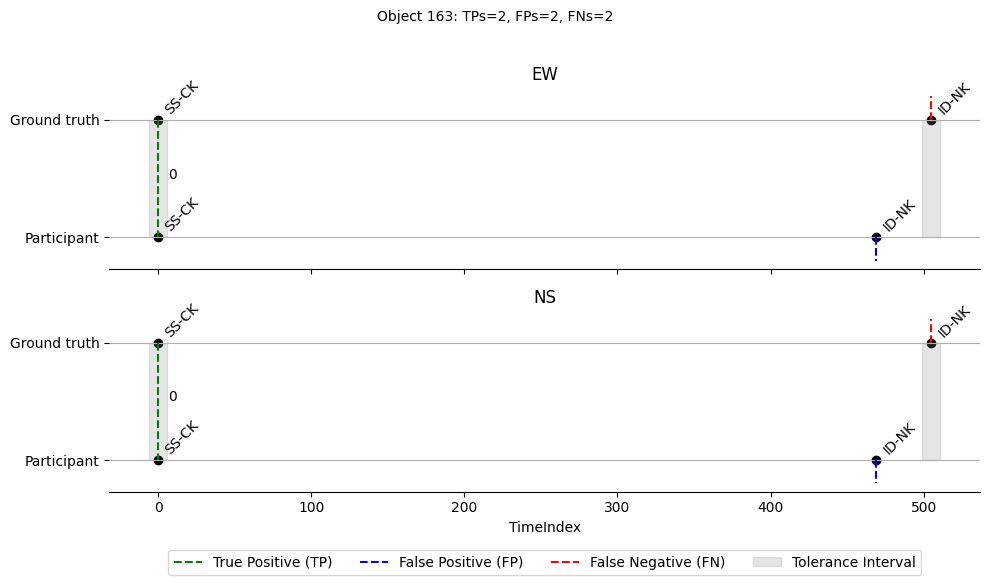

In [11]:
evaluator.plot(163)

In [158]:
# we also know

   ObjectID  TimeIndex Direction Node Type
0         1          0        EW   SS   HK
1         1          0        NS   SS   HK
2         5          0        EW   SS   EK
3         5          0        NS   SS   CK


In [159]:
evaluator_new = evaluation.NodeDetectionEvaluator(ground_truth=ground_truth_df, participant=filtered_df)
precision, recall, f2, rmse, total_tp, total_fp, total_fn, total_df_new = evaluator_new.score()
print(f2, total_tp, total_fp, total_fn)

0.9662288930581614 1751 86 55


In [123]:
fn_objs_new = total_df_new.loc[total_df['classification']=='FN']
fp_objs_new = total_df_new.loc[total_df['classification']=='FP'] # some locs are counted twice
print((fn_objs_new['ObjectID'].value_counts()[:6]))
print((fp_objs_new['ObjectID'].value_counts()[:6]))

ObjectID
1510    5
1387    4
1390    3
494     2
1391    2
147     2
Name: count, dtype: int64
ObjectID
244     6
262     5
400     5
12      4
1387    4
158     4
Name: count, dtype: int64


In [144]:
print(pd.concat([fn_objs, fn_objs_new]).drop_duplicates(keep=False)['ObjectID'].unique())

[ 158  163  204  232  244  281  286  309  331  378  413  435  444  458
  460  487  509 1053 1371 1383 1385 1387 1422 1429 1474 1510 1607 1726
 1729 1774  160  171  182  243  247  262  303  319  326  342  449  461
  467  494  532  758 1075 1390 1391 1392 1444 1539 1666 1766 1776 1833]


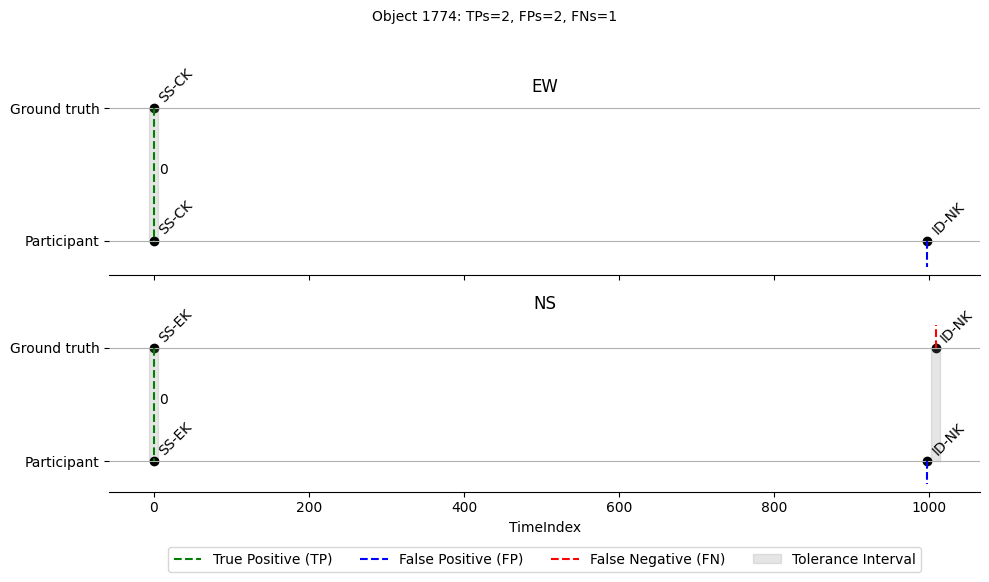

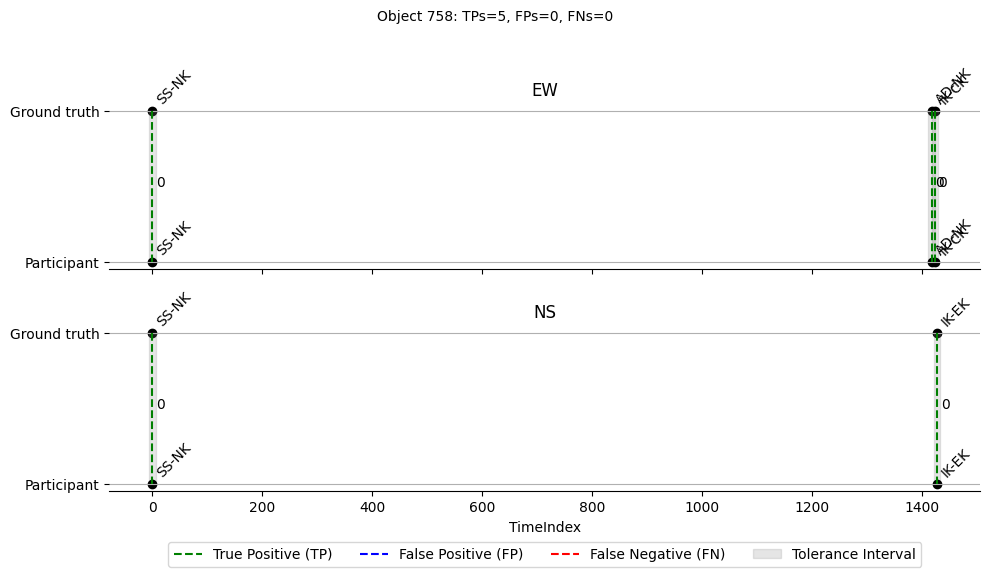

In [179]:
evaluator.plot(1774)
evaluator_new.plot(758)

In [10]:
ss_fp_objs = fp_objs.loc[fp_objs['TimeIndex']==0]
print(ss_fp_objs.head(10))

    ObjectID  TimeIndex Direction Node Type classification distance matched
0          1          0        EW   SS   HK             FP        0     NaN
1          1          0        NS   SS   HK             FP        0     NaN
2          1          0        EW   SS   EK             FP        0    True
3          1          0        NS   SS   CK             FP        0    True
4          5          0        EW   SS   EK             FP        0     NaN
6          5          0        EW   SS   CK             FP        0    True
7         10          0        EW   SS   CK             FP        0     NaN
9         10          0        EW   SS   HK             FP        0    True
11        12          0        EW   SS   HK             FP        0     NaN
12        12          0        NS   SS   HK             FP        0     NaN


/tmp/ipykernel_910231/2993587175.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


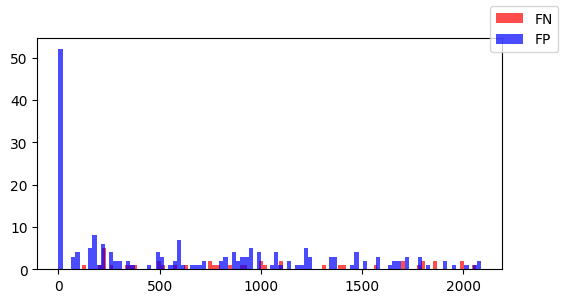

In [7]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
ax.hist(fn_objs['TimeIndex'], bins=100, alpha=0.7, label='FN', color='red')
ax.hist(fp_objs['TimeIndex'], bins=100, alpha=0.7, label='FP', color='blue')
fig.legend()
fig.show()